In [1]:
from helpers import *
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from helpersTimo import *
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import math 


In [2]:
dfs = preprocessing()
folder_path = "dataset/wikispeedia_paths-and-graph/"
dfs["article"] = pd.read_csv(folder_path + "articleAndGender.csv", sep=",")
gender_dict = dfs["article"].set_index("article")['gender'].to_dict()

In [3]:
## Use Examples ##
print(dfs["article"].loc[dfs["article"]["article"] == "United_States"].values[0][1]) 
print(gender_dict["United_States"])

Unknown
Unknown


In [4]:
graph_female, name_targets_F = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"], gender_dict, "Female")

In [5]:
graph_female, name_targets_F = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"], gender_dict, "Female")
graph_male, name_targets_M = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"], gender_dict, "Male")
df_pagerank_female = get_df_pagerank(graph_female)
df_pagerank_male = get_df_pagerank(graph_male)

In [183]:
print(name_targets_F)

['Elizabeth_I_of_England', 'Elizabeth_I_of_England', 'Elizabeth_I_of_England', 'Elizabeth_I_of_England', 'Elizabeth_I_of_England', 'Martina_Navratilova', 'Matilda_of_Boulogne', 'H.D.', 'Mary_I_of_England', 'Mary_I_of_England', 'Natalie_Portman', 'Natalie_Portman', 'Natalie_Portman', 'Natalie_Portman', 'Natalie_Portman', 'Natalie_Portman', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Florence_Nightingale', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Anne_Frank', 'Mary_I_of_England', 'Diane_Keaton', 'Cleopatra_VII', 'Elizabeth_II_of_the_United_Kingdom', 'Condoleezza_Rice', 'Condoleezza_Rice', 'Condoleezza_Rice', 'Keira_Knightley', 'Condoleezza_Rice', 'Hatshepsut', 'Indira_Gandhi', 'Condoleezza_Rice', 'Condoleezza_Rice', 'Elizabeth_II_of_the_United_Kingdom',

In [6]:
## J'ai plus de nodes qu'avant !!!????
graph_female.number_of_nodes()

1175

In [7]:
## J'ai plus de nodes qu'avant !!!????
graph_male.number_of_nodes()

3400

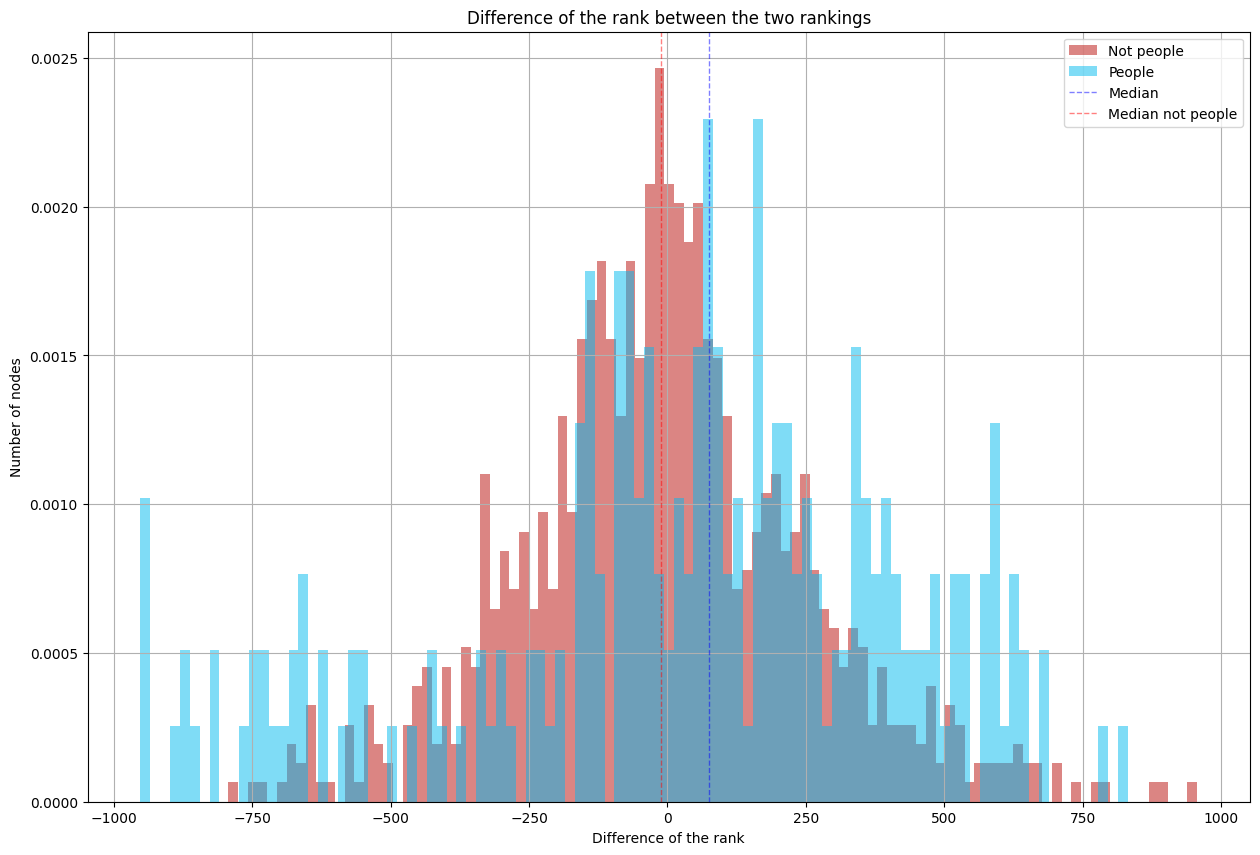

(30.145454545454545, 75.0, -7.527809307604994, -12.0)

In [117]:
mean_median_change_in_rank_of_peoples(df_pagerank_female, df_pagerank_male, gender_dict)

In [36]:
links_network = create_graph_links(dfs["links"])
df_pagerank_links = get_df_pagerank(links_network)

In [37]:
network_both_gender, endnode_names_both_gender = create_graph_Gender(dfs["paths_finished"], dfs["paths_unfinished"] , gender_dict, "Male", last_node_from_path= False, both_gender=True) 
print(network_both_gender.number_of_nodes())
df_pagerank_both_gend = get_df_pagerank(network_both_gender)

3474


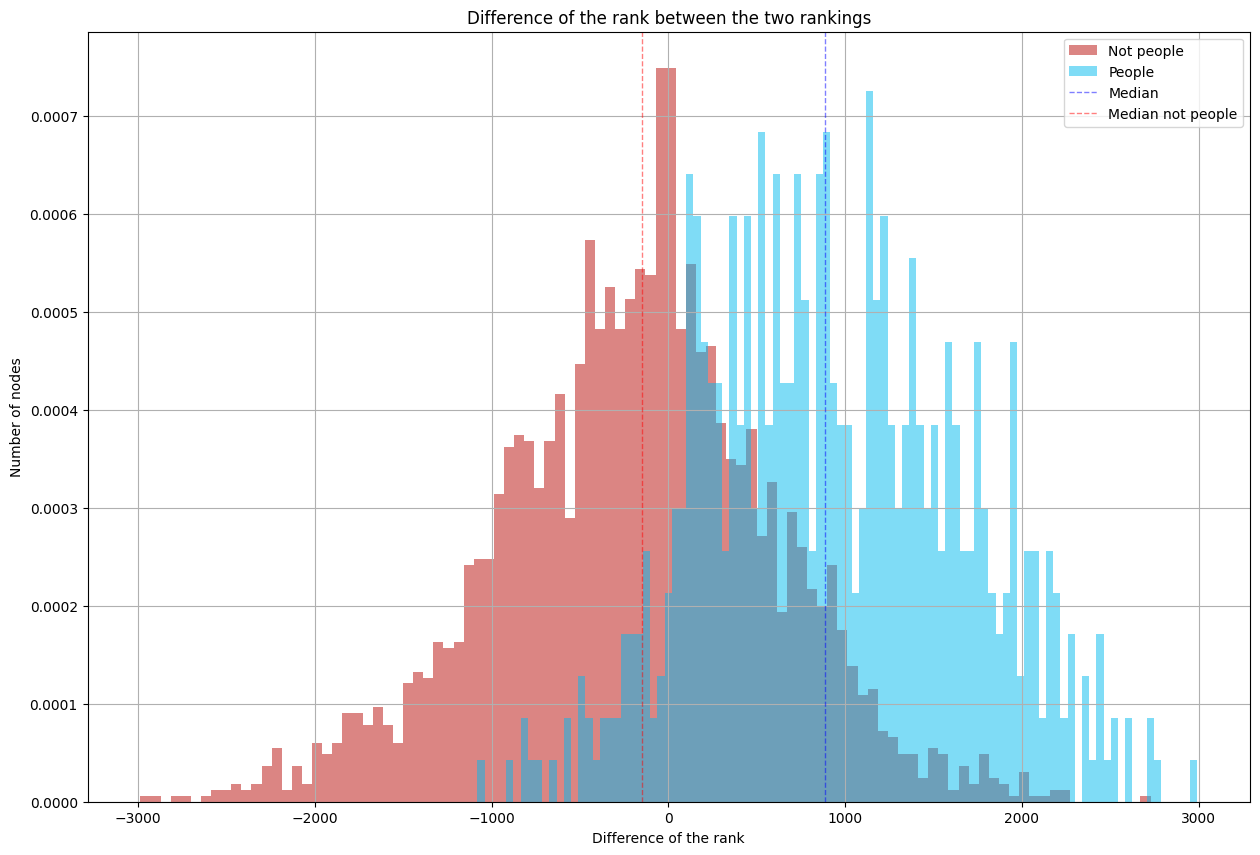

(939.9391304347826, 887.0, -186.49585921325053, -146.5)

In [116]:
mean_median_change_in_rank_of_peoples(df_pagerank_links, df_pagerank_both_gend, gender_dict)

In [181]:
def mean_median_change_in_rank_of_peoples(df_pagerank_before, df_pagerank_after, gender_dict):
    """
    Returns the mean and median of the change in rank of the nodes that are people or not and graphs the distribution of the change in rank

    Args:
        df_pagerank_before (dataframe): dataframe with the PageRank of each node in the fisrt ranking
        df_pagerank_after (dataframe): dataframe with the PageRank of each node in the second ranking
        gender_dict (dict): Dictionary of the genders of the nodes
    
    Returns:
        mean_people (float): mean of the change in rank of the people
        median_people (float): median of the change in rank of the people
        mean_not_people (float): mean of the change in rank of the not people
        median_not_people (float): median of the change in rank of the not people

    """
    df_diff = compare_rankings2(df_pagerank_before, df_pagerank_after)

    desired_genders = ['Male', 'Female']

    # Use the map function to map nodes to their genders
    df_diff['node_gender'] = df_diff.index.map(gender_dict)

    #Filter rows based on the desired genders
    df_diff_subset_people = df_diff[df_diff['node_gender'].isin(desired_genders)]

    df_diff_subset_not_people = df_diff[~df_diff['node_gender'].isin(desired_genders)]
    

    # plot the diff of the df_diff_subset_people
    fig, axes = plt.subplots(1, 1, figsize=(15, 10))
    axes.hist(df_diff_subset_not_people["Diff"], bins=100, alpha=0.5, label='Not people', color="#B80C09", density=True)
    axes.hist(df_diff_subset_people["Diff"], bins=100, alpha=0.5, label='People', color="#01BAEF", density=True)

    axes.axvline(df_diff_subset_people["Diff"].median(), color='blue', linestyle='dashed', linewidth=1, alpha=0.5, label='Median')
    axes.axvline(df_diff_subset_not_people["Diff"].median(), color='red', linestyle='dashed', linewidth=1, alpha=0.5, label='Median not people')
    axes.legend()
    axes.set_title("Difference of the rank between the two rankings")
    axes.set_xlabel("Difference of the rank")
    axes.set_ylabel("Number of nodes")
    axes.grid(True)
    axes.text(100, 0.00075, 'Better ranked after', bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'boxstyle': "rarrow, pad=0.3", 'ec': 'green'})
    axes.text(-100, 0.00075, 'Better ranked before', ha= "right", bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'boxstyle': "larrow, pad=0.3", 'ec': 'red'})
    plt.show()

    return df_diff_subset_people["Diff"].mean(), df_diff_subset_people["Diff"].median(), df_diff_subset_not_people["Diff"].mean(), df_diff_subset_not_people["Diff"].median()

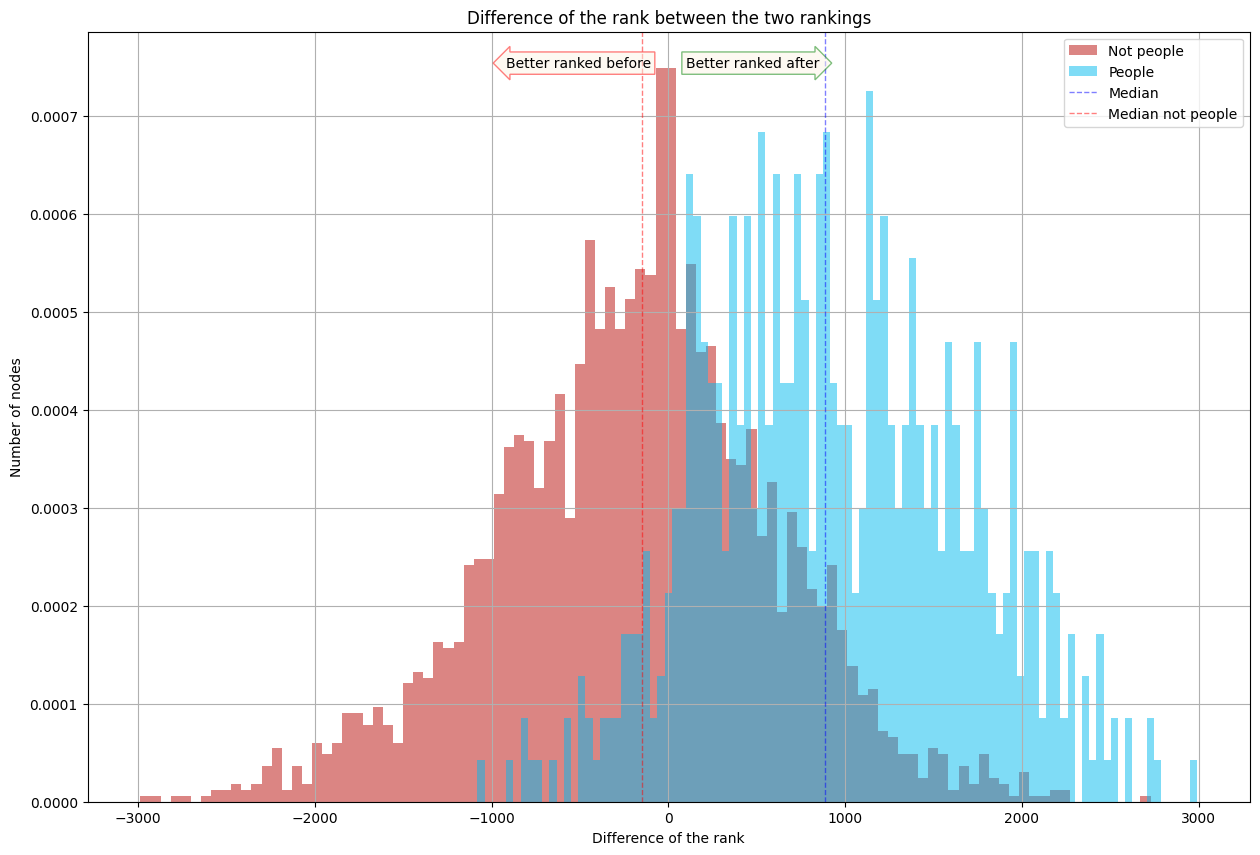

(939.9391304347826, 887.0, -186.49585921325053, -146.5)

In [182]:
mean_median_change_in_rank_of_peoples(df_pagerank_links, df_pagerank_both_gend, gender_dict)